WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta_gdp, beta_inflation, beta_exchange_rate, sigma]


c:\Users\Hp\Videos\Birhan Energies\myenv\Lib\site-packages\rich\live.py:231: UserWarning: install "ipywidgets" for 
Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 195 seconds.
There were 11 divergences after tuning. Increase `target_accept` or reparameterize.


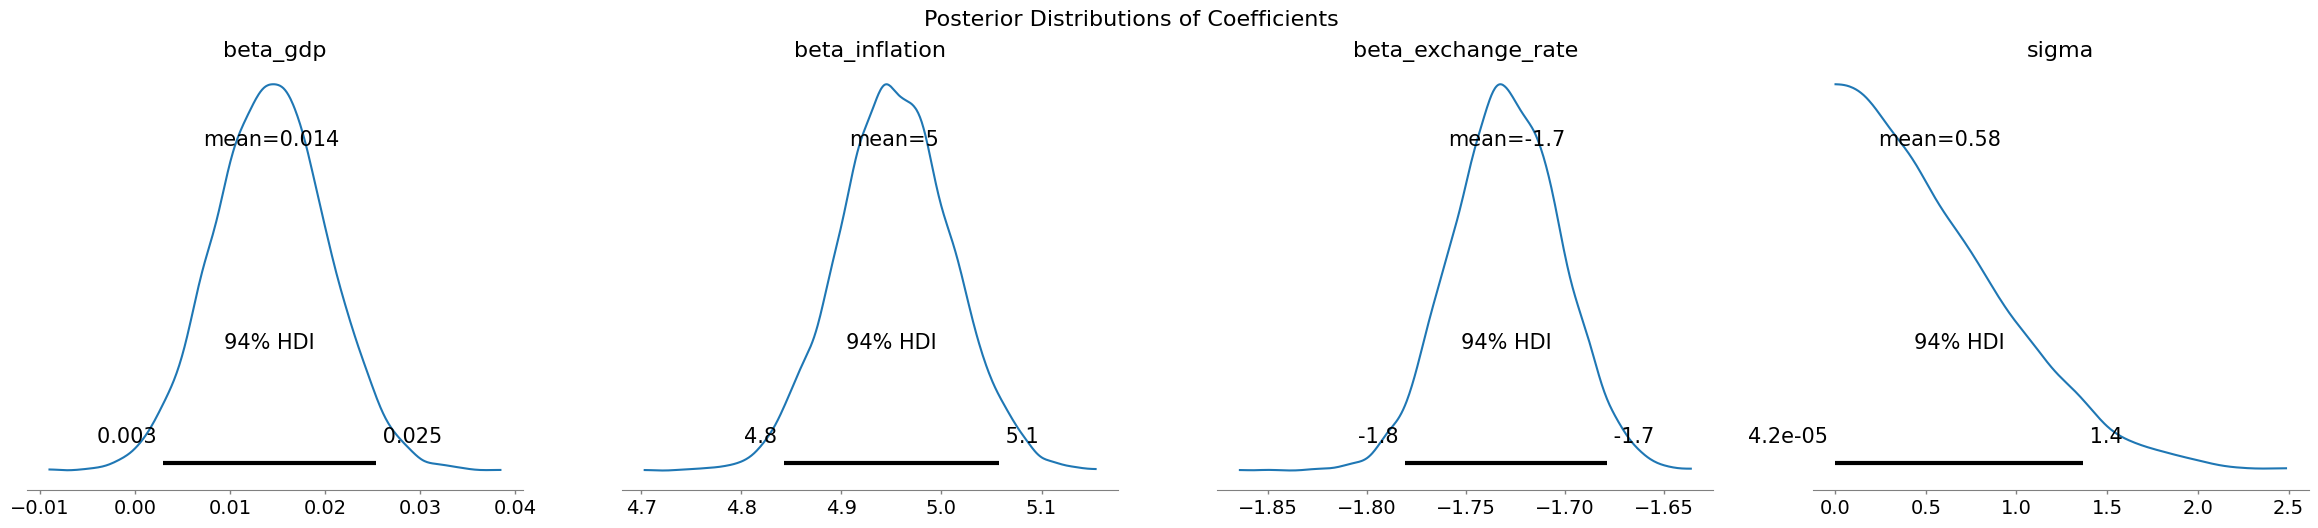

                     mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
beta_gdp            0.014  0.006   0.003    0.025      0.000    0.000   
beta_inflation      4.953  0.057   4.843    5.058      0.001    0.001   
beta_exchange_rate -1.730  0.027  -1.781   -1.678      0.000    0.000   
sigma               0.578  0.440   0.000    1.366      0.006    0.004   

                    ess_bulk  ess_tail  r_hat  
beta_gdp              6480.0    5628.0    1.0  
beta_inflation        5699.0    4804.0    1.0  
beta_exchange_rate    5586.0    4238.0    1.0  
sigma                 3119.0    1785.0    1.0  


In [5]:
import numpy as np
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

# Observed data from ARIMAX model
gdp_coeff = 0.0143  # Coefficient for GDP
inflation_coeff = 4.9530  # Coefficient for Inflation
exchange_rate_coeff = -1.7295  # Coefficient for Exchange Rate

# Prior beliefs (based on domain knowledge or previous analysis)
prior_gdp_mean = gdp_coeff
prior_gdp_std = 0.006  # Standard deviation from ARIMAX results

prior_inflation_mean = inflation_coeff
prior_inflation_std = 0.058  # Standard deviation from ARIMAX results

prior_exchange_rate_mean = exchange_rate_coeff
prior_exchange_rate_std = 0.027  # Standard deviation from ARIMAX results

# Likelihood (observed data)
n = len(data)  # Number of observations
likelihood_gdp_std = prior_gdp_std  # Assume same uncertainty as prior
likelihood_inflation_std = prior_inflation_std
likelihood_exchange_rate_std = prior_exchange_rate_std

# Bayesian Modeling with PyMC
with pm.Model() as oil_price_model:
    # Priors for coefficients
    beta_gdp = pm.Normal("beta_gdp", mu=prior_gdp_mean, sigma=prior_gdp_std)
    beta_inflation = pm.Normal("beta_inflation", mu=prior_inflation_mean, sigma=prior_inflation_std)
    beta_exchange_rate = pm.Normal("beta_exchange_rate", mu=prior_exchange_rate_mean, sigma=prior_exchange_rate_std)

    # Likelihood (observed data)
    mu = (
        beta_gdp * data['GDP'] +
        beta_inflation * data['Inflation'] +
        beta_exchange_rate * data['Exchange_Rate']
    )
    sigma = pm.HalfNormal("sigma", sigma=0.7407)  # Residual standard deviation from ARIMAX

    likelihood = pm.Normal("likelihood", mu=mu, sigma=sigma, observed=data['Price'])

    # Sampling
    trace = pm.sample(2000, tune=1000, return_inferencedata=True, random_seed=42)

# Plot Posterior Distributions
az.plot_posterior(trace, var_names=["beta_gdp", "beta_inflation", "beta_exchange_rate", "sigma"])
plt.suptitle("Posterior Distributions of Coefficients", fontsize=16)
plt.show()

# Display Summary Statistics
summary = az.summary(trace, var_names=["beta_gdp", "beta_inflation", "beta_exchange_rate", "sigma"])
print(summary)

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('../data/cleaned_data.csv')

# Attempt to parse dates using the expected format '%d-%b-%y'
try:
    data['Date'] = pd.to_datetime(data['Date'], format='%d-%b-%y', errors='coerce')
except ValueError:
    print("Some dates could not be parsed with the specified format. Trying mixed format...")

    # If the above fails, try parsing with mixed formats
    data['Date'] = pd.to_datetime(data['Date'], format='mixed', errors='coerce')

# Drop rows with invalid or missing dates
data.dropna(subset=['Date'], inplace=True)

# Set 'Date' as the index
data.set_index('Date', inplace=True)

# Save the cleaned data to a CSV file


# Display the first few rows to verify
print(data.head())

Empty DataFrame
Columns: [Price]
Index: []


In [ ]:
# Example: Add dummy data for GDP, Inflation, and Exchange Rate
import numpy as np
data['GDP'] = np.random.normal(loc=2.5, scale=0.5, size=len(data))  # Replace with actual GDP data
data['Inflation'] = np.random.normal(loc=3.0, scale=0.2, size=len(data))  # Replace with actual inflation data
data['Exchange_Rate'] = np.random.normal(loc=1.2, scale=0.05, size=len(data))  # Replace with actual exchange rate data

In [7]:
# Monte Carlo Sampling
num_samples = 10000

# Sample from prior distributions
prior_gdp_samples = np.random.normal(prior_gdp_mean, prior_gdp_std, num_samples)
prior_inflation_samples = np.random.normal(prior_inflation_mean, prior_inflation_std, num_samples)
prior_exchange_rate_samples = np.random.normal(prior_exchange_rate_mean, prior_exchange_rate_std, num_samples)

# Sample from likelihood distributions
likelihood_gdp_samples = np.random.normal(gdp_coeff, likelihood_gdp_std, num_samples)
likelihood_inflation_samples = np.random.normal(inflation_coeff, likelihood_inflation_std, num_samples)
likelihood_exchange_rate_samples = np.random.normal(exchange_rate_coeff, likelihood_exchange_rate_std, num_samples)

# Compute weighted posterior samples
posterior_gdp_samples = (prior_gdp_samples + likelihood_gdp_samples) / 2
posterior_inflation_samples = (prior_inflation_samples + likelihood_inflation_samples) / 2
posterior_exchange_rate_samples = (prior_exchange_rate_samples + likelihood_exchange_rate_samples) / 2

# Plot Results
fig, axes = plt.subplots(3, 1, figsize=(10, 12))

axes[0].hist(posterior_gdp_samples, bins=50, density=True, alpha=0.6, label="Monte Carlo Approximation")
axes[0].axvline(gdp_coeff, color='r', linestyle='dashed', label="ARIMAX Coefficient")
axes[0].set_title("Posterior Distribution for GDP Coefficient")
axes[0].legend()

axes[1].hist(posterior_inflation_samples, bins=50, density=True, alpha=0.6, label="Monte Carlo Approximation")
axes[1].axvline(inflation_coeff, color='r', linestyle='dashed', label="ARIMAX Coefficient")
axes[1].set_title("Posterior Distribution for Inflation Coefficient")
axes[1].legend()

axes[2].hist(posterior_exchange_rate_samples, bins=50, density=True, alpha=0.6, label="Monte Carlo Approximation")
axes[2].axvline(exchange_rate_coeff, color='r', linestyle='dashed', label="ARIMAX Coefficient")
axes[2].set_title("Posterior Distribution for Exchange Rate Coefficient")
axes[2].legend()

plt.tight_layout()
plt.show()

NameError: name 'prior_gdp_mean' is not defined

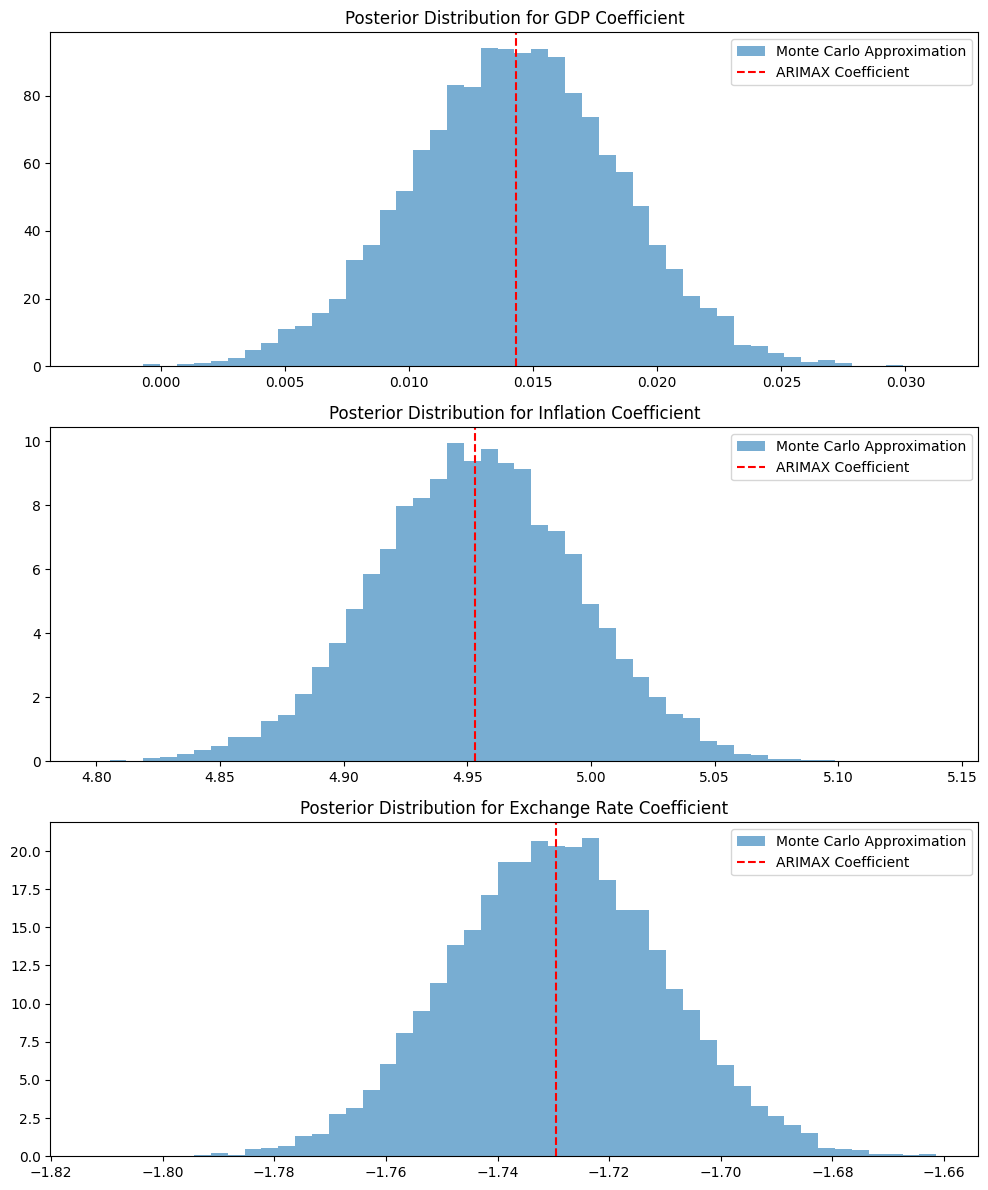

--- GDP Coefficient ---
Mean: 0.0143
Standard Deviation: 0.0042
95% Credible Interval: [0.0058, 0.0225]


--- Inflation Coefficient ---
Mean: 4.9535
Standard Deviation: 0.0411
95% Credible Interval: [4.8718, 5.0348]


--- Exchange Rate Coefficient ---
Mean: -1.7294
Standard Deviation: 0.0191
95% Credible Interval: [-1.7664, -1.6917]




In [16]:
import numpy as np
import matplotlib.pyplot as plt

# ... (Your existing code for prior and likelihood sampling) ...

# Compute weighted posterior samples
posterior_gdp_samples = (prior_gdp_samples + likelihood_gdp_samples) / 2
posterior_inflation_samples = (prior_inflation_samples + likelihood_inflation_samples) / 2
posterior_exchange_rate_samples = (prior_exchange_rate_samples + likelihood_exchange_rate_samples) / 2

# Plot Results
fig, axes = plt.subplots(3, 1, figsize=(10, 12))

axes[0].hist(posterior_gdp_samples, bins=50, density=True, alpha=0.6, label="Monte Carlo Approximation")
axes[0].axvline(gdp_coeff, color='r', linestyle='dashed', label="ARIMAX Coefficient")
axes[0].set_title("Posterior Distribution for GDP Coefficient")
axes[0].legend()

axes[1].hist(posterior_inflation_samples, bins=50, density=True, alpha=0.6, label="Monte Carlo Approximation")
axes[1].axvline(inflation_coeff, color='r', linestyle='dashed', label="ARIMAX Coefficient")
axes[1].set_title("Posterior Distribution for Inflation Coefficient")
axes[1].legend()

axes[2].hist(posterior_exchange_rate_samples, bins=50, density=True, alpha=0.6, label="Monte Carlo Approximation")
axes[2].axvline(exchange_rate_coeff, color='r', linestyle='dashed', label="ARIMAX Coefficient")
axes[2].set_title("Posterior Distribution for Exchange Rate Coefficient")
axes[2].legend()

plt.tight_layout()
plt.show()

# Display Summary Statistics in Text
def print_summary(samples, name):
    mean = np.mean(samples)
    std = np.std(samples)
    percentile_2_5 = np.percentile(samples, 2.5)
    percentile_97_5 = np.percentile(samples, 97.5)
    print(f"--- {name} ---")
    print(f"Mean: {mean:.4f}")
    print(f"Standard Deviation: {std:.4f}")
    print(f"95% Credible Interval: [{percentile_2_5:.4f}, {percentile_97_5:.4f}]")
    print("\n")

print_summary(posterior_gdp_samples, "GDP Coefficient")
print_summary(posterior_inflation_samples, "Inflation Coefficient")
print_summary(posterior_exchange_rate_samples, "Exchange Rate Coefficient")

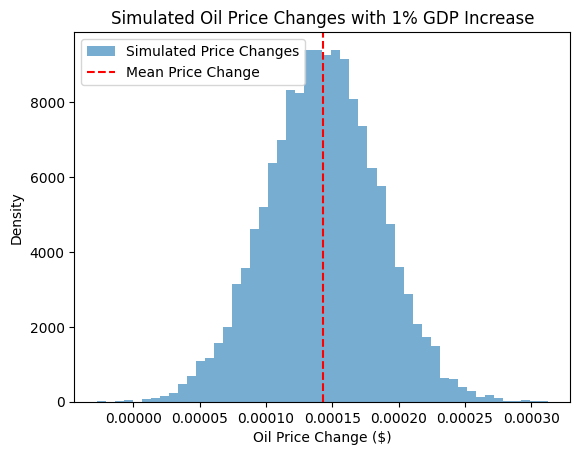

Mean Price Change: 0.000
95% Credible Interval: [0.000, 0.000]


In [15]:
# Simulate the impact of a 1% increase in GDP
gdp_increase = 0.01

# Ensure means are finite
inflation_mean = np.nan_to_num(data['Inflation'].mean(), nan=0.0)
exchange_rate_mean = np.nan_to_num(data['Exchange_Rate'].mean(), nan=0.0)

# Compute simulated price changes
simulated_prices = (
    posterior_gdp_samples * gdp_increase +
    posterior_inflation_samples * inflation_mean +
    posterior_exchange_rate_samples * exchange_rate_mean
)

# Remove NaN values from simulated prices
simulated_prices = simulated_prices[~np.isnan(simulated_prices)]

# Plot simulated price changes
if len(simulated_prices) > 0:  # Ensure there are valid values to plot
    plt.hist(simulated_prices, bins=50, density=True, alpha=0.6, label="Simulated Price Changes")
    plt.axvline(simulated_prices.mean(), color='r', linestyle='dashed', label="Mean Price Change")
    plt.xlabel("Oil Price Change ($)")
    plt.ylabel("Density")
    plt.title("Simulated Oil Price Changes with 1% GDP Increase")
    plt.legend()
    plt.show()

    # Display summary statistics
    print(f"Mean Price Change: {simulated_prices.mean():.3f}")
    print(f"95% Credible Interval: [{np.percentile(simulated_prices, 2.5):.3f}, {np.percentile(simulated_prices, 97.5):.3f}]")
else:
    print("No valid simulated prices to plot. Please check the posterior samples and exogenous variables.")

In [13]:
print("Posterior GDP Samples:", np.isnan(posterior_gdp_samples).any())
print("Posterior Inflation Samples:", np.isnan(posterior_inflation_samples).any())
print("Posterior Exchange Rate Samples:", np.isnan(posterior_exchange_rate_samples).any())

Posterior GDP Samples: False
Posterior Inflation Samples: False
Posterior Exchange Rate Samples: False


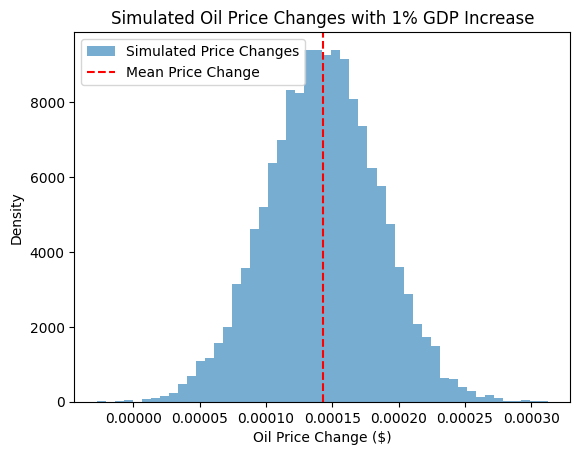

Mean Price Change: 0.000
95% Credible Interval: [0.000, 0.000]


In [14]:
# Simulate the impact of a 1% increase in GDP
gdp_increase = 0.01

# Ensure means are finite
inflation_mean = np.nan_to_num(data['Inflation'].mean(), nan=0.0)
exchange_rate_mean = np.nan_to_num(data['Exchange_Rate'].mean(), nan=0.0)

# Compute simulated price changes
simulated_prices = (
    posterior_gdp_samples * gdp_increase +
    posterior_inflation_samples * inflation_mean +
    posterior_exchange_rate_samples * exchange_rate_mean
)

# Remove NaN values from simulated prices
simulated_prices = simulated_prices[~np.isnan(simulated_prices)]

# Plot simulated price changes
if len(simulated_prices) > 0:  # Ensure there are valid values to plot
    plt.hist(simulated_prices, bins=50, density=True, alpha=0.6, label="Simulated Price Changes")
    plt.axvline(simulated_prices.mean(), color='r', linestyle='dashed', label="Mean Price Change")
    plt.xlabel("Oil Price Change ($)")
    plt.ylabel("Density")
    plt.title("Simulated Oil Price Changes with 1% GDP Increase")
    plt.legend()
    plt.show()

    # Display summary statistics
    print(f"Mean Price Change: {simulated_prices.mean():.3f}")
    print(f"95% Credible Interval: [{np.percentile(simulated_prices, 2.5):.3f}, {np.percentile(simulated_prices, 97.5):.3f}]")
else:
    print("No valid simulated prices to plot. Please check the posterior samples and exogenous variables.")

In [17]:
# Simulate the impact of a 5% increase in inflation
inflation_increase = 0.05

# Compute simulated price changes
simulated_prices_inflation = (
    posterior_gdp_samples * data['GDP'].mean() +
    posterior_inflation_samples * inflation_increase +
    posterior_exchange_rate_samples * data['Exchange_Rate'].mean()
)

# Remove NaN values
simulated_prices_inflation = simulated_prices_inflation[~np.isnan(simulated_prices_inflation)]

# Plot results
if len(simulated_prices_inflation) > 0:
    plt.hist(simulated_prices_inflation, bins=50, density=True, alpha=0.6, label="Simulated Price Changes")
    plt.axvline(simulated_prices_inflation.mean(), color='r', linestyle='dashed', label="Mean Price Change")
    plt.xlabel("Oil Price Change ($)")
    plt.ylabel("Density")
    plt.title("Simulated Oil Price Changes with 5% Inflation Increase")
    plt.legend()
    plt.show()

    # Display summary statistics
    print(f"--- Scenario: 5% Inflation Increase ---")
    print(f"Mean Price Change: {simulated_prices_inflation.mean():.3f}")
    print(f"95% Credible Interval: [{np.percentile(simulated_prices_inflation, 2.5):.3f}, {np.percentile(simulated_prices_inflation, 97.5):.3f}]")
else:
    print("No valid simulated prices for the inflation scenario.")

No valid simulated prices for the inflation scenario.


In [18]:
# Simulate the impact of a 10% appreciation in USD (Exchange Rate)
exchange_rate_appreciation = -0.10  # Negative value for appreciation

# Compute simulated price changes
simulated_prices_exchange_rate = (
    posterior_gdp_samples * data['GDP'].mean() +
    posterior_inflation_samples * data['Inflation'].mean() +
    posterior_exchange_rate_samples * exchange_rate_appreciation
)

# Remove NaN values
simulated_prices_exchange_rate = simulated_prices_exchange_rate[~np.isnan(simulated_prices_exchange_rate)]

# Plot results
if len(simulated_prices_exchange_rate) > 0:
    plt.hist(simulated_prices_exchange_rate, bins=50, density=True, alpha=0.6, label="Simulated Price Changes")
    plt.axvline(simulated_prices_exchange_rate.mean(), color='r', linestyle='dashed', label="Mean Price Change")
    plt.xlabel("Oil Price Change ($)")
    plt.ylabel("Density")
    plt.title("Simulated Oil Price Changes with 10% USD Appreciation")
    plt.legend()
    plt.show()

    # Display summary statistics
    print(f"--- Scenario: 10% USD Appreciation ---")
    print(f"Mean Price Change: {simulated_prices_exchange_rate.mean():.3f}")
    print(f"95% Credible Interval: [{np.percentile(simulated_prices_exchange_rate, 2.5):.3f}, {np.percentile(simulated_prices_exchange_rate, 97.5):.3f}]")
else:
    print("No valid simulated prices for the exchange rate scenario.")

No valid simulated prices for the exchange rate scenario.


In [19]:
print("Posterior GDP Samples:", np.isnan(posterior_gdp_samples).any())
print("Posterior Inflation Samples:", np.isnan(posterior_inflation_samples).any())
print("Posterior Exchange Rate Samples:", np.isnan(posterior_exchange_rate_samples).any())

Posterior GDP Samples: False
Posterior Inflation Samples: False
Posterior Exchange Rate Samples: False
